In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# carrega dados brutos csv para dataframe pandas
RAW_df_day = pd.read_csv("day.csv")

In [3]:
# dataframe contendo dados diários do período de 2 anos
RAW_df_day.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


# Exploratory Data Analysis

In [4]:
# o README original do dataset informa que a temperatura está normalizada pelo valor maximo de 41 graus celsius, porém
# esse valor (1.0 no dado normalizado) está ausente. Possivelmente temos um subset.
RAW_df_day.loc[RAW_df_day['temp'] == RAW_df_day['temp'].max()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
553,554,2012-07-07,3,1,7,0,6,0,1,0.861667,0.804913,0.492083,0.163554,1448,3392,4840


In [5]:
# shape do dataframe
RAW_df_day.shape

(731, 16)

In [6]:
# tipos dos dados
RAW_df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
# desconsidera a coluna windspeed, pois falta a unidade física na fonte
df_day = RAW_df_day.drop(columns="windspeed")
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,82,1518,1600


In [8]:
# conta valores NULL ou NA
df_day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
# confere se valores únicos estão de acordo com o proposto no problema
" \
seasons: {}, \
years: {}, \
months: {}, \
holidays: {}, \
weekdays: {}, \
workingdays: {}, \
weathersits: {}" \
.format(
df_day['season'].nunique(),
df_day['yr'].nunique(),
df_day['mnth'].nunique(),
df_day['holiday'].nunique(),
df_day['weekday'].nunique(),
df_day['workingday'].nunique(),
df_day['weathersit'].nunique()
)

' seasons: 4, years: 2, months: 12, holidays: 2, weekdays: 7, workingdays: 2, weathersits: 3'

Há apenas 3 valores de season, possivelmente não ocorreu um dos 4 eventos climáticos

In [10]:
# desnormaliza as colunas pelo seu valor máximo declarado, usando 2 casas decimais
df_day["temp"] = (df_day["temp"] * 41).round(2)
df_day["atemp"] = (df_day["atemp"] * 50).round(2)
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,14.11,18.18,0.805833,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,14.90,17.69,0.696087,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,8.05,9.47,0.437273,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,8.20,10.61,0.590435,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,9.31,11.46,0.436957,82,1518,1600


In [11]:
# modifica umidade para 2 casas decimais, mas mantém normalização;
df_day["hum"] = df_day["hum"].round(2)
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,14.11,18.18,0.81,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,14.90,17.69,0.70,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,8.05,9.47,0.44,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,8.20,10.61,0.59,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,9.31,11.46,0.44,82,1518,1600


In [12]:
# amostra aleatória do dataset para análise superficial
df_day.sample(8)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,casual,registered,cnt
449,450,2012-03-25,2,1,3,0,0,0,2,17.94,21.87,0.88,1532,3464,4996
216,217,2011-08-05,3,0,8,0,5,1,1,29.14,32.83,0.63,1023,3843,4866
259,260,2011-09-17,3,0,9,0,6,0,2,20.16,23.93,0.72,1434,3077,4511
71,72,2011-03-13,1,0,3,0,0,0,1,15.76,19.00,0.53,982,1435,2417
588,589,2012-08-11,3,1,8,0,6,0,2,28.39,31.91,0.73,2247,4052,6299
396,397,2012-02-01,1,1,2,0,3,1,1,19.24,23.33,0.51,304,4275,4579
534,535,2012-06-18,2,1,6,0,1,1,2,23.30,27.24,0.78,653,4446,5099
84,85,2011-03-26,2,0,3,0,6,0,1,10.90,12.88,0.39,981,1515,2496


In [13]:
# temp e hum são valores diários máximos
df_day.groupby(['yr','mnth'])['temp','cnt'].describe()

<ipython-input-13-434b3fe5651a>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_day.groupby(['yr','mnth'])['temp','cnt'].describe()


temp                                                               \
        count       mean       std    min      25%     50%      75%    max   
yr mnth                                                                      
0  1     31.0   8.105806  2.576602   2.42   6.8450   8.060   9.0400  14.90   
   2     28.0  11.584643  3.844960   5.53   8.9525  11.360  13.3075  21.39   
   3     31.0  13.598065  3.059606   8.13  10.9650  13.010  15.5950  22.14   
   4     30.0  19.318333  4.035141  12.30  16.9275  18.845  22.8850  25.90   
   5     31.0  23.666452  3.490271  16.98  21.7100  22.550  26.3950  31.78   
   6     30.0  28.416333  2.085114  24.77  26.5900  28.525  29.8250  33.14   
   7     31.0  31.101613  1.974374  27.20  29.7050  30.650  32.2550  34.82   
   8     31.0  28.919355  1.617756  26.10  27.9650  28.990  29.5400  32.12   
   9     30.0  25.130000  2.362159  19.24  23.8600  25.995  26.6725  29.08   
   10    31.0  19.268387  3.452629  10.42  17.3050  19.850  21.9850  24.16   
   11    30.0  16.495667  2.558092  11.24  14.7925  16.415  18.2800  21.73   
   12    31.0  13.331935  2.677247   9.05  11.3100  12.810  15.6000  18.96   
1  1     31.0  11.282258  3.441878   4.41   8.3550  11.240  13.9250  17.42   
   2     29.0  12.928966  2.955251   5.23  11.4500  12.850  14.5200  19.24   
   3     31.0  18.425806  4.005989   9.98  15.8700  19.130  21.7150  24.67   
   4     30.0  19.221000  3.122487  13.19  17.5425  18.895  20.4300  27.23   
   5     31.0  25.107419  2.227013  20.74  23.3200  25.110  26.4800  29.62   
   6     30.0  27.679333  3.211155  22.17  24.9900  26.855  29.9475  34.20   
   7     31.0  30.847097  2.300999  24.43  29.4650  30.780  32.2050  35.33   
   8     31.0  29.183871  1.671312  26.07  28.2350  29.350  30.4600  32.53   
   9     30.0  25.424000  2.736456  21.08  23.7050  25.060  26.9350  30.89   
   10    31.0  20.502903  3.378211  13.05  18.1750  21.080  22.6350  26.96   
   11    30.0  13.780333  1.969270  10.08  12.1775  13.990  14.7625  19.88   
   12    31.0  13.238065  2.926409   8.85  10.4900  13.150  15.2550  19.51   

          cnt                                                              \
        count         mean          std     min      25%     50%      75%   
yr mnth                                                                     
0  1     31.0  1231.903226   372.432665   431.0   985.50  1248.0  1505.50   
   2     28.0  1721.964286   398.508839  1005.0  1512.50  1629.0  1839.50   
   3     31.0  2065.967742   550.971716   605.0  1868.50  2077.0  2313.50   
   4     30.0  3162.333333  1042.093593   795.0  2302.75  3226.5  4013.00   
   5     31.0  4381.322581   572.927883  2633.0  4114.00  4451.0  4696.50   
   6     30.0  4783.733333   444.447812  3767.0  4557.50  4839.5  5094.25   
   7     31.0  4559.387097   680.090762  3285.0  4172.00  4541.0  4982.50   
   8     31.0  4409.387097   809.852401  1115.0  4151.50  4602.0  4818.50   
   9     30.0  4247.266667   965.377251  1842.0  3721.00  4584.5  4828.00   
   10    31.0  3984.225806  1103.481844   627.0  3450.50  4304.0  4756.50   
   11    30.0  3405.566667   788.249290  1495.0  2963.00  3631.0  4043.25   
   12    31.0  2816.870968   958.763187   705.0  2427.00  3068.0  3595.50   
1  1     31.0  3120.774194   872.852134  1301.0  2339.50  3243.0  3823.50   
   2     29.0  3556.448276   870.724640  1529.0  2947.00  3777.0  4169.00   
   3     31.0  5318.548387  1251.162682  3194.0  4473.50  5382.0  6143.00   
   4     30.0  5807.466667  1308.938916  1027.0  5449.75  6214.5  6538.75   
   5     31.0  6318.225806  1078.403997  2843.0  5893.00  6421.0  6956.50   
   6     30.0  6761.000000   954.204995  4127.0  6307.75  6988.0  7454.00   
   7     31.0  6567.967742   867.183736  4459.0  6217.00  6685.0  7160.50   
   8     31.0  6919.451613   794.059017  4549.0  6664.00  7148.0  7454.50   
   9     30.0  7285.766667   979.160925  4073.0  6874.00  7514.5  7853.50   
   10    31.0  6414.225806  1941.819400    22.0  5720.

In [14]:
df_day.groupby(['yr','mnth'])['hum','cnt'].describe()

<ipython-input-14-c2f52dab27b5>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_day.groupby(['yr','mnth'])['hum','cnt'].describe()


hum                                                          cnt  \
        count      mean       std   min     25%    50%     75%   max count   
yr mnth                                                                      
0  1     31.0  0.584839  0.133588  0.40  0.4800  0.540  0.6900  0.86  31.0   
   2     28.0  0.560714  0.171980  0.19  0.4400  0.540  0.6850  0.93  28.0   
   3     31.0  0.570000  0.204385  0.00  0.4600  0.550  0.7000  0.95  31.0   
   4     30.0  0.669000  0.150730  0.41  0.5400  0.680  0.8025  0.89  30.0   
   5     31.0  0.713548  0.114646  0.44  0.6350  0.730  0.8000  0.92  31.0   
   6     30.0  0.592667  0.120428  0.30  0.5025  0.610  0.6775  0.77  30.0   
   7     31.0  0.589355  0.096607  0.40  0.5400  0.590  0.6500  0.76  31.0   
   8     31.0  0.626452  0.123600  0.42  0.5500  0.600  0.7400  0.85  31.0   
   9     30.0  0.784333  0.103879  0.59  0.7025  0.745  0.8875  0.97  30.0   
   10    31.0  0.706452  0.110952  0.48  0.6250  0.710  0.7650  0.91  31.0   
   11    30.0  0.674667  0.138458  0.41  0.5825  0.685  0.7550  0.96  30.0   
   12    31.0  0.649677  0.127397  0.49  0.5650  0.630  0.6950  0.97  31.0   
1  1     31.0  0.586774  0.169123  0.31  0.4450  0.530  0.7300  0.91  31.0   
   2     29.0  0.574138  0.117823  0.40  0.5100  0.540  0.6700  0.80  29.0   
   3     31.0  0.608387  0.167692  0.29  0.4800  0.580  0.7500  0.89  31.0   
   4     30.0  0.508333  0.145888  0.25  0.4025  0.480  0.5850  0.84  30.0   
   5     31.0  0.664839  0.119467  0.36  0.5650  0.700  0.7550  0.81  31.0   
   6     30.0  0.558000  0.107908  0.36  0.4900  0.570  0.5975  0.83  30.0   
   7     31.0  0.605806  0.110778  0.45  0.5150  0.600  0.6750  0.87  31.0   
   8     31.0  0.648387  0.070904  0.52  0.6050  0.650  0.6950  0.85  31.0   
   9     30.0  0.645667  0.111624  0.47  0.5550  0.640  0.7375  0.87  30.0   
   10    31.0  0.680645  0.109451  0.46  0.6300  0.690  0.7450  0.88  31.0   
   11    30.0  0.574000  0.094999  0.33  0.5225  0.565  0.6425  0.79  30.0   
   12    31.0  0.682903  0.144573  0.44  0.5700  0.670  0.8000  0.92  31.0   

                                                                             
                mean          std     min      25%     50%      75%     max  
yr mnth                                                                      
0  1     1231.903226   372.432665   431.0   985.50  1248.0  1505.50  1985.0  
   2     1721.964286   398.508839  1005.0  1512.50  1629.0  1839.50  2927.0  
   3     2065.967742   550.971716   605.0  1868.50  2077.0  2313.50  3239.0  
   4     3162.333333  1042.093593   795.0  2302.75  3226.5  4013.00  5312.0  
   5     4381.322581   572.927883  2633.0  4114.00  4451.0  4696.50  5805.0  
   6     4783.733333   444.447812  3767.0  4557.50  4839.5  5094.25  5515.0  
   7     4559.387097   680.090762  3285.0  4172.00  4541.0  4982.50  6043.0  
   8     4409.387097   809.852401  1115.0  4151.50  4602.0  4818.50  5895.0  
   9     4247.266667   965.377251  1842.0  3721.00  4584.5  4828.00  5423.0  
   10    3984.225806  1103.481844   627.0  3450.50  4304.0  4756.50  5511.0  
   11    3405.566667   788.249290  1495.0  2963.00  3631.0  4043.25  4486.0  
   12    2816.870968   958.763187   705.0  2427.00  3068.0  3595.50  3940.0  
1  1     3120.774194   872.852134  1301.0  2339.50  3243.0  3823.50  4521.0  
   2     3556.448276   870.724640  1529.0  2947.00  3777.0  4169.00  5062.0  
   3     5318.548387  1251.162682  3194.0  4473.50  5382.0  6143.00  8362.0  
   4     5807.466667  1308.938916  1027.0  5449.75  6214.5  6538.75  7460.0  
   5     6318.225806  1078.403997  2843.0  5893.00  6421.0  6956.50  8294.0  
   6     6761.000000   954.204995  4127.0  6307.75  6988.0  7454.00  8120.0  
   7     6567.967742   867.183736  4459.0  6217.00  6685.0  7160.50  8173.0  
   8     6919.451613   794.059017  4549.0  6664.00  7148.0  7454.50  7865.0  
   9     7285.766667   979.160925  4073.0  6874.00  7514.5  7853.50  8714.0  
   10    6414.225806  1941.8194

In [15]:
# cnt em função da estação do ano
df_day.groupby('season')['cnt'].sum()

season
1     471348
2     918589
3    1061129
4     841613
Name: cnt, dtype: int64

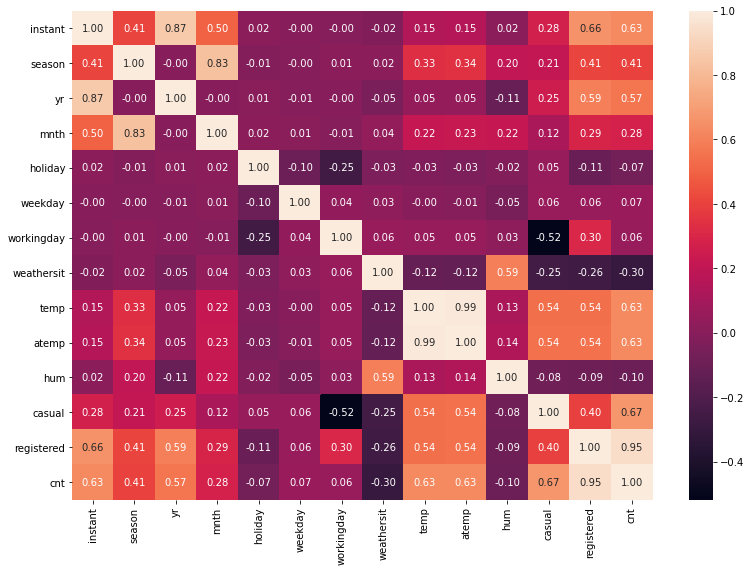

In [16]:
# heatmap para analisar correlação, qto mais prox de 1.0 maior é a covariância
plt.figure(figsize=(13,9))
sns.heatmap(df_day.corr(), annot=True, fmt='.2f')
plt.show()

A correlação entre 'instant' e 'registered' mostra que o número de corridas aumentou de um ano para o próximo.

Possivelmente temos um  dataset desbalanceado

<AxesSubplot:xlabel='mnth'>

<Figure size 1440x1080 with 0 Axes>

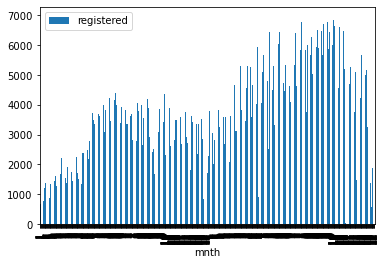

In [17]:
plt.figure(figsize=(20,15))
df_day.plot.bar(y='registered', x='mnth')

<AxesSubplot:xlabel='mnth'>

<Figure size 1440x1080 with 0 Axes>

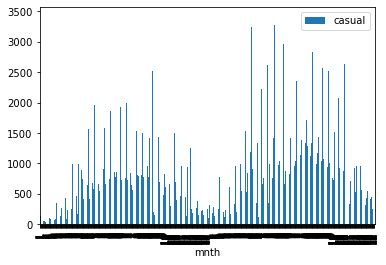

In [18]:
plt.figure(figsize=(20,15))
df_day.plot.bar(y='casual', x='mnth')

In [19]:
df_day.groupby('yr')['registered'].sum()

yr
0     995851
1    1676811
Name: registered, dtype: int64

In [20]:
df_day.groupby('yr')['casual'].sum()

yr
0    247252
1    372765
Name: casual, dtype: int64

In [21]:
# tipifica as colunas categóricas
cat_col = ["season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit"]
for col in cat_col: 
  df_day[col] = df_day[col].astype('category')

In [22]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   instant     731 non-null    int64   
 1   dteday      731 non-null    object  
 2   season      731 non-null    category
 3   yr          731 non-null    category
 4   mnth        731 non-null    category
 5   holiday     731 non-null    category
 6   weekday     731 non-null    category
 7   workingday  731 non-null    category
 8   weathersit  731 non-null    category
 9   temp        731 non-null    float64 
 10  atemp       731 non-null    float64 
 11  hum         731 non-null    float64 
 12  casual      731 non-null    int64   
 13  registered  731 non-null    int64   
 14  cnt         731 non-null    int64   
dtypes: category(7), float64(3), int64(4), object(1)
memory usage: 52.2+ KB


In [23]:
df_day.describe()

,instant,temp,atemp,hum,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,20.310821,23.717784,0.627921,848.176471,3656.172367,4504.348837
std,211.165812,7.505177,8.148006,0.142636,686.622488,1560.256377,1937.211452
min,1.000000,2.420000,3.950000,0.000000,2.000000,20.000000,22.000000
25%,183.500000,13.820000,16.895000,0.520000,315.500000,2497.000000,3152.000000
50%,366.000000,20.430000,24.340000,0.630000,713.000000,3662.000000,4548.000000
75%,548.500000,26.875000,30.430000,0.730000,1096.000000,4776.500000,5956.000000
max,731.000000,35.330000,42.040000,0.970000,3410.000000,6946.000000,8714.000000


# Univariate Analysis

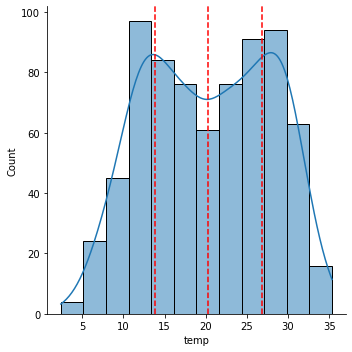

In [24]:
# variável temperatura (maior correlação com 'cnt')
sns.displot(x="temp", data=df_day, kde=True)
description = df_day['temp'].describe()
plt.axvline(description["25%"], ls="--", color='r')
plt.axvline(description["mean"], ls="--", color='r')
plt.axvline(description["75%"], ls="--", color='r')

C:\Users\ludma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


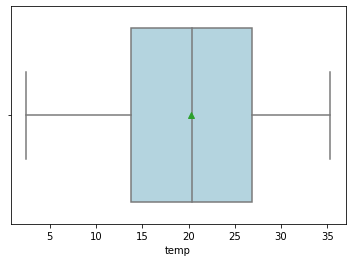

In [25]:
sns.boxplot(df_day['temp'], showmeans=True, color='lightblue');

In [26]:
# verifica outliers, método 3sigma
temp_upl = df_day['temp'].mean() + 3*df_day['temp'].std()
temp_lwl = df_day['temp'].mean() - 3*df_day['temp'].std()
print(
    "Upper limit", temp_upl,
    "\nLower limit", temp_lwl
    )

Upper limit 42.82635151761136 
Lower limit -2.2047099307440945


In [27]:
# retorna os outliers do dataframe
df_day[(df_day['temp'] > temp_upl) | (df_day['temp'] < temp_lwl)]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,casual,registered,cnt


Não há outliers na distruição de temperatura

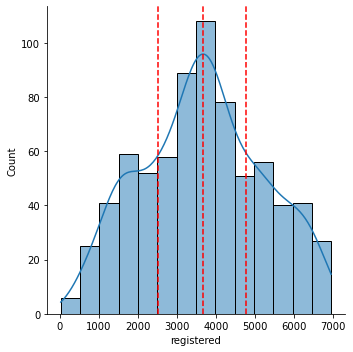

In [28]:
# variável registered
sns.displot(x="registered", data=df_day, kde=True)
description = df_day['registered'].describe()
plt.axvline(description["25%"], ls="--", color='r')
plt.axvline(description["mean"], ls="--", color='r')
plt.axvline(description["75%"], ls="--", color='r')

C:\Users\ludma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


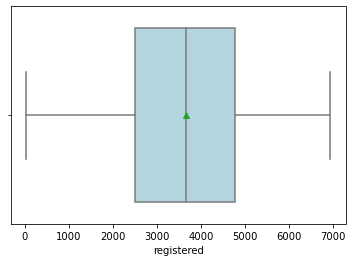

In [29]:
sns.boxplot(df_day['registered'], showmeans=True, color='lightblue');

In [30]:
# verifica outliers, método 3sigma
registered_upl = df_day['registered'].mean() + 3*df_day['registered'].std()
registered_lwl = df_day['registered'].mean() - 3*df_day['registered'].std()
print(
    "Upper limit", registered_upl,
    "\nLower limit", registered_lwl
    )

Upper limit 8336.941497679425 
Lower limit -1024.5967644372909


In [31]:
# retorna os outliers do dataframe
df_day[(df_day['registered'] > registered_upl) | (df_day['registered'] < registered_lwl)]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,casual,registered,cnt


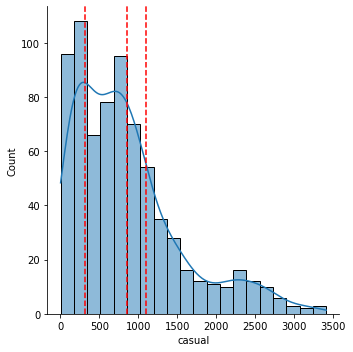

In [32]:
# variável casual
sns.displot(x="casual", data=df_day, kde=True)
description = df_day['casual'].describe()
plt.axvline(description["25%"], ls="--", color='r')
plt.axvline(description["mean"], ls="--", color='r')
plt.axvline(description["75%"], ls="--", color='r')

C:\Users\ludma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


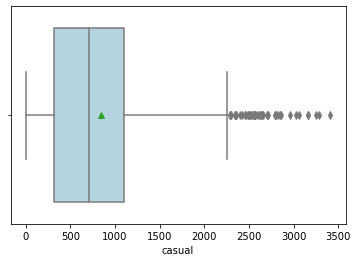

In [33]:
sns.boxplot(df_day['casual'], showmeans=True, color='lightblue');

In [34]:
# verifica outliers, método 3sigma
casual_upl = df_day['casual'].mean() + 3*df_day['casual'].std()
casual_lwl = df_day['casual'].mean() - 3*df_day['casual'].std()
print(
    "Upper limit", casual_upl,
    "\nLower limit", casual_lwl
    )

Upper limit 2908.0439354421997 
Lower limit -1211.6909942657294


In [35]:
# retorna os outliers do dataframe
outliers = list(df_day[(df_day['casual'] > casual_upl) | (df_day['casual'] < casual_lwl)].index)
outliers

[184, 441, 462, 504, 512, 532, 623, 644]

In [36]:
# dataframe de saída da análise univariada
df_un = df_day.drop(index=outliers)

In [37]:
df_un.shape

(723, 15)

In [38]:
df_un.skew(numeric_only=True).sort_values(ascending=False)

casual        1.142894
registered    0.053595
instant       0.012738
temp         -0.042175
cnt          -0.049432
hum          -0.055244
atemp        -0.118023
dtype: float64

# Bivariate Analysis

<AxesSubplot:xlabel='workingday', ylabel='cnt'>

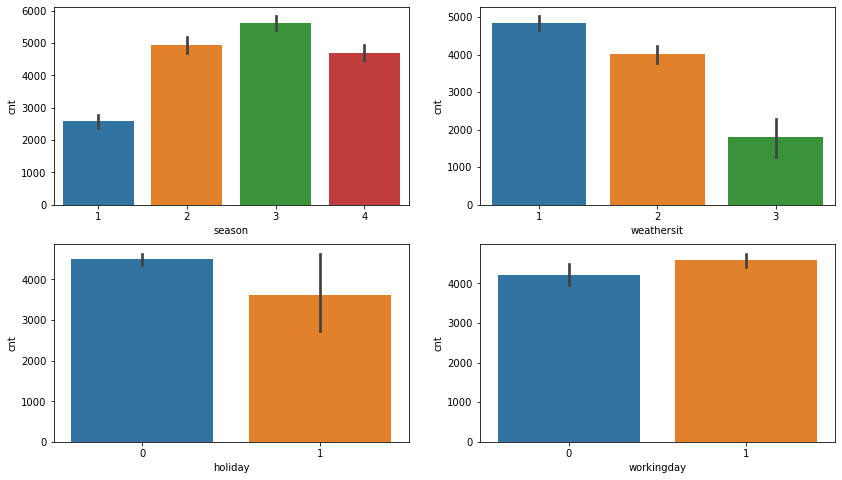

In [39]:
fig, ax = plt.subplots(2,2, figsize = (14,8))
sns.barplot(x= 'season', y='cnt', data = df_un, ax = ax[0][0])
sns.barplot(x= 'weathersit', y='cnt', data = df_un, ax = ax[0][1])
sns.barplot(x= 'holiday', y='cnt', data = df_un, ax = ax[1][0])
sns.barplot(x= 'workingday', y='cnt', data = df_un, ax = ax[1][1])

- season (1:springer, 2:summer, 3:fall, 4:winter): maior número de viajens totais na primavera
- weathersit: maior número de viajens totais com céu claro; não houve registro de dia tipo 4
        - 1: Clear, Few clouds, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

<AxesSubplot:xlabel='temp', ylabel='casual'>

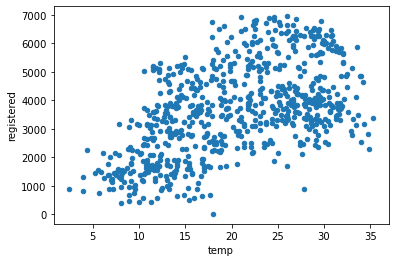

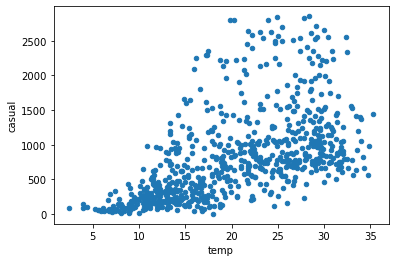

In [40]:
df_un.plot.scatter('temp','registered')
df_un.plot.scatter('temp','casual')

<AxesSubplot:xlabel='hum', ylabel='casual'>

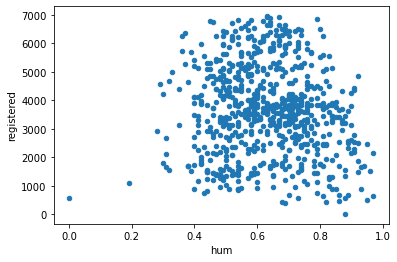

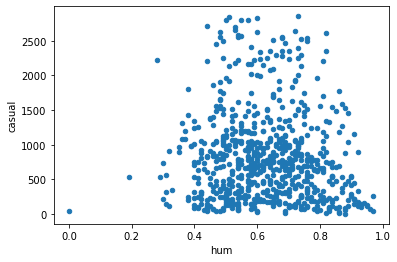

In [41]:
df_un.plot.scatter('hum','registered')
df_un.plot.scatter('hum','casual')

In [42]:
# histograma das corridas por dia da semana
weekday_histReg = df_un.groupby('weekday')['registered'].sum()
weekday_histCas = df_un.groupby('weekday')['casual'].sum()

weekday
0    300198
1    381741
2    411266
3    415729
4    423935
5    409552
6    295558
Name: registered, dtype: int64


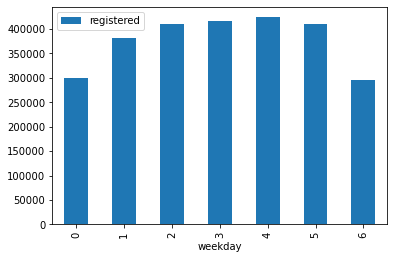

In [43]:
print(weekday_histReg)
weekday_histReg.plot.bar(y='registered').legend()

weekday
0    137238
1     67719
2     57843
3     57319
4     61460
5     78238
6    134881
Name: casual, dtype: int64


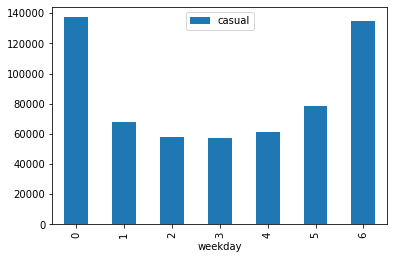

In [44]:
print(weekday_histCas)
weekday_histCas.plot.bar(y='casual').legend()

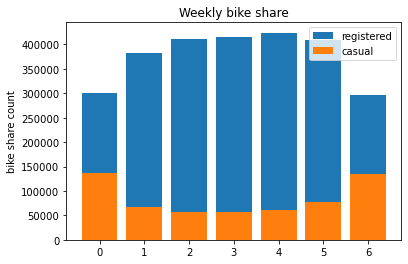

In [45]:
label = list(set(df_un['weekday']))

fig, ax = plt.subplots()

ax.bar(label, weekday_histReg, label='registered')
ax.bar(label, weekday_histCas, label='casual')

ax.set_title('Weekly bike share')
ax.set_ylabel('bike share count')
ax.legend()

As corridas casuais ocorrem com maior frequência aos finais de semana,
enquanto as registradas nos dias úteis 1-5. A análise de predição será separada em 2 grupos com os targets 'registered' e 'casual'

Há 2 pontos de humidade notadamente outliers em 0 e 20%; devem ser removidos dos dados

In [46]:
# drop dos outliers visuais, exclusão de linha
df_un['hum'].sort_values().head()

68     0.00
49     0.19
463    0.28
451    0.29
86     0.30
Name: hum, dtype: float64

In [47]:
# dataframe de saída da análise bivariada
df_bi = df_un.drop(index=[68,49])

In [48]:
df_bi.shape

(721, 15)

# Multivariate Analysis

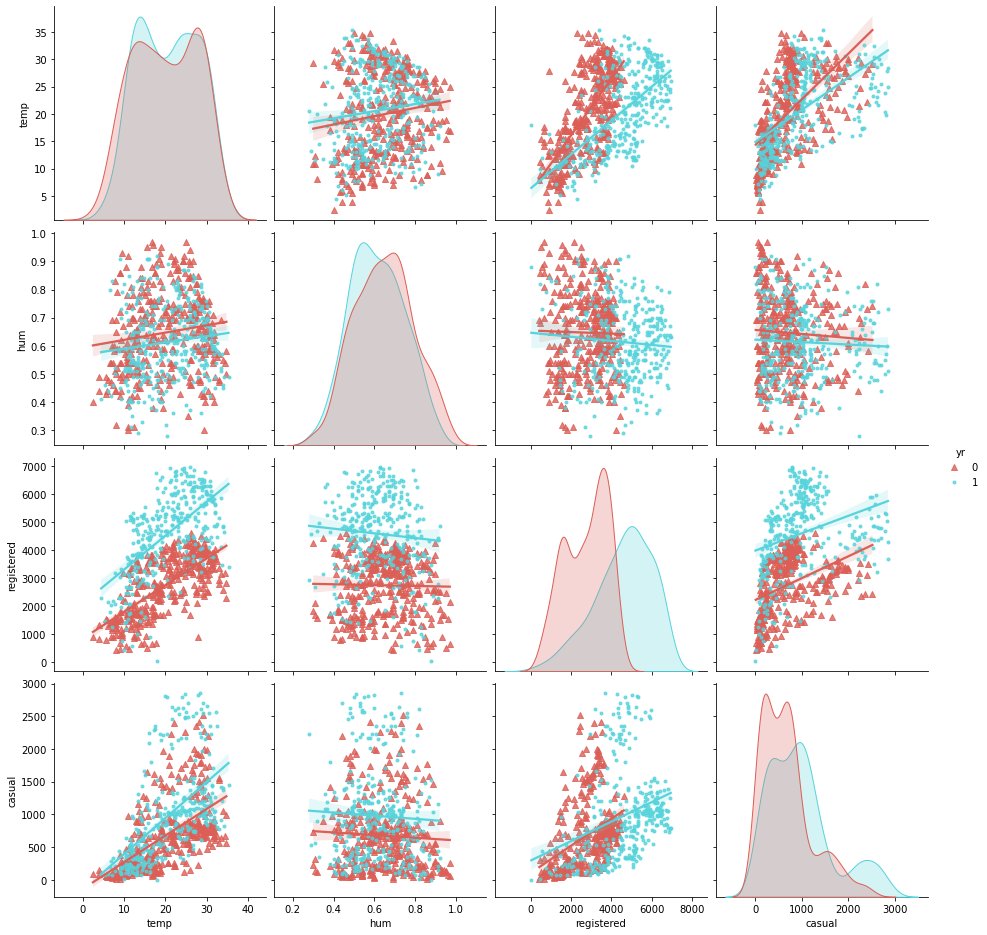

In [49]:
sns.pairplot(data=df_bi, vars=['temp','hum','registered','casual'], \
             hue='yr', kind='reg', diag_kind='kde', markers=['^','.'], height=3.3, palette='hls');

Novamente se observa a grande variação do registered x temp, por ano

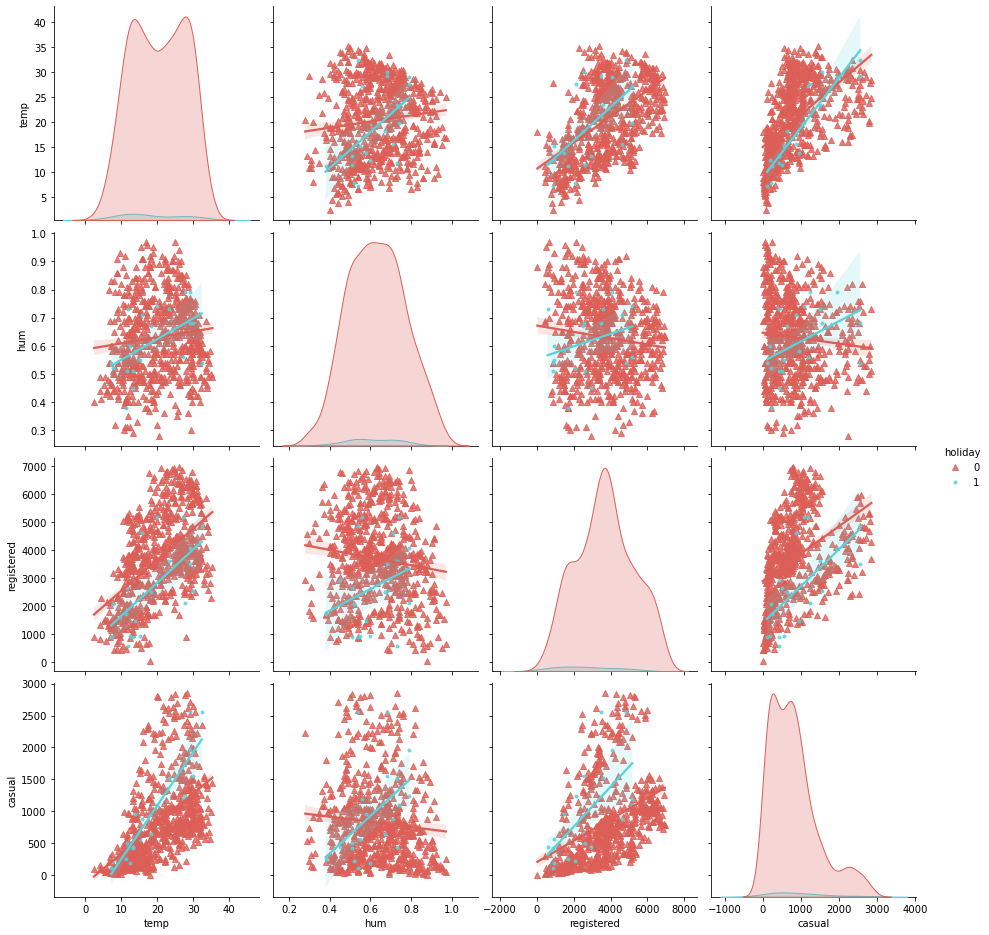

In [50]:
sns.pairplot(data=df_bi, vars=['temp','hum','registered','casual'], \
             hue='holiday', kind='reg', diag_kind='kde', markers=['^','.'], height=3.3, palette='hls');

In [51]:
# dataframe de saída da análise multivariada
df_mult = df_bi

# Model preparation

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

In [53]:
# as seguintes colunas não são de interesse para o modelo
df = df_mult.drop(columns=['instant','dteday','atemp','cnt'], axis=1)

In [54]:
df.dtypes

season        category
yr            category
mnth          category
holiday       category
weekday       category
workingday    category
weathersit    category
temp           float64
hum            float64
casual           int64
registered       int64
dtype: object

In [55]:
# dummy enconding method (k-1 variáveis dummy)
# NOT one-hot-encode method (k variáveis dummy)
# k-1 dummies: drop_first=True

cols = ['yr','season','mnth','weekday','weathersit','workingday','holiday']
df_model = pd.get_dummies(df, columns=cols, drop_first=True)

In [57]:
df_model.shape

(721, 29)

In [58]:
df_model.head()

,temp,hum,casual,registered,yr_1,season_2,season_3,season_4,mnth_2,mnth_3,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3,workingday_1,holiday_1
0,14.11,0.81,331,654,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,14.90,0.70,131,670,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,8.05,0.44,120,1229,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,8.20,0.59,108,1454,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,9.31,0.44,82,1518,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [59]:
X = df_model.drop(['registered', 'casual'], axis=1)
y1 = df_model['registered']
y2 = df_model['casual']

X.shape, y1.shape, y2.shape

((721, 27), (721,), (721,))

In [60]:
# REGISTERED
# prepara as variaveis (X,y1) para o modelo
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.3)
X_train.shape

(504, 27)

In [61]:
regr = RandomForestRegressor(random_state=0)
regr.fit(X_train, y_train)
pred_reg = regr.predict(X_test)

print(
    'Test R2 SCORE:', r2_score(y_test, pred_reg).round(3),
    '\nTest RMSE:', np.sqrt(mean_squared_error(y_test, pred_reg)).round(3),
    '\nTest MAE:', mean_absolute_error(y_test, pred_reg).round(3),
    )

Test R2 SCORE: 0.886 
Test RMSE: 533.329 
Test MAE: 393.697


In [62]:
# CASUAL
# prepara as variaveis (X,y2) para o modelo
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.3)
X_train.shape

(504, 27)

In [63]:
from sklearn.ensemble import ExtraTreesRegressor

reg = ExtraTreesRegressor(bootstrap=True, random_state=2).fit(X_train, y_train)
reg.score(X_test, y_test)

0.8452890451139587

In [64]:
reg.get_params(deep=True)

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 2,
 'verbose': 0,
 'warm_start': False}

In [65]:
regr = RandomForestRegressor(random_state=0)
regr.fit(X_train, y_train)
pred_reg = regr.predict(X_test)

print(
    'Test R2 SCORE:', r2_score(y_test, pred_reg).round(3),
    '\nTest RMSE:', np.sqrt(mean_squared_error(y_test, pred_reg)).round(3),
    '\nTest MAE:', mean_absolute_error(y_test, pred_reg).round(3),
    )

Test R2 SCORE: 0.859 
Test RMSE: 267.254 
Test MAE: 182.226


# Comentários finais

Os dados do dataset apresentam qualidade na coleta, possuei poucos outliers, nenhum valor null/na.

Outros regressores foram testados mas não apresentados para não poluir este notebook (eg. GradientBoostingRegressor).

O modelo foi capaz de obter ótimos R2 Scores de ~0.88 e ~0.85 para os targets 'registered' e 'casual', respectivamente.
Em um ambiente de produção, para prever o número de corridas totais ('cnt') basta somar a saída dos modelos.
Pelo comportamento característico de aluguel de bikes notadamente diferente entre as duas categorias de aluguel 'registered' e 'casual', o modelo de aprendizado de máquina foi propositalmente separedo nessas duas categorias. Os dados refletem um perfil de utilização diferente entre essas categorias, inferindo-se que há dois modelos de negócio em um macro maior.


Problemas encontrados:
- Falta da unidade física da velocidade do vento, ainda que seja possível inferir.
- Valor máximo da temperatura utilizado para normalização não é verificado no dataset, sendo possivelmente um subset de uma base de dados mais ampla.

Pontos de melhoria:
- Fazer um fine tuning dos parâmetros de over-sampling SMOTE para balancear a contagem 'registered' e 'casual' dos anos 0 e 1, ao mesmo tempo tentando evitar o overfitting.
- A grande variação de corridas entre os dois anos dificulta a capacidade de predição do(s) modelo(s). Seriam necessários mais dados de outros anos para se obeter R2 Scores acima de 0.9 nem a necessidade de over-sampling.